In [1]:
import math

import numpy as np
import scipy.signal
from matplotlib import pyplot as plt
from scipy.signal import lfilter

# Задание 1a

m = 4, T = 3.0
m = 5, T = 2.4
m = 7, T = 1.7142857142857144
m = 10, T = 1.2


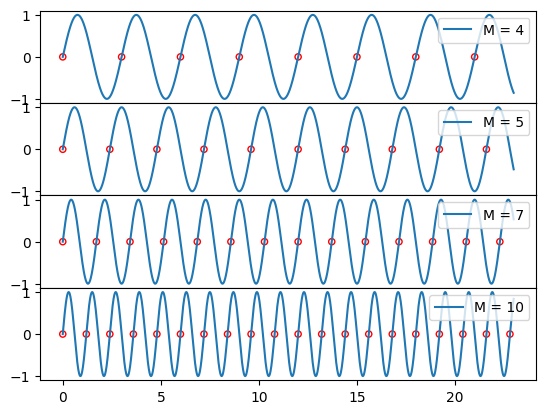

In [2]:
def get_sin_period(a):
    return 2 * math.pi / abs(a)

N = 12
m = np.atleast_2d(np.array([4, 5, 7, 10]))
x = np.arange(0, 2 * N - 1, 0.01)
y = np.sin(2 * np.pi * m.T * x / N)

plt.subplots_adjust(hspace=0.000)
fig = plt.figure(1)
for i, (y_local, m_val) in enumerate(zip(y, m[0])):
    ax = fig.add_subplot(m.shape[1], 1, i + 1)
    ax.plot(x, y_local, label=f'M = {m_val}')
    period = get_sin_period(2 * np.pi * m_val / N)
    period_x = np.arange(0, 2 * N - 1, period)
    period_y = np.zeros(period_x.shape)
    print(f'm = {m_val}, T = {period}')
    ax.scatter(period_x, period_y, 20, c='None', edgecolors='red')
    ax.legend(loc='upper right')

$$ T = \frac{2\pi}{|A|},\ x[n] = sin(An) $$
Для $ A = \frac{2\pi m}{N} $, выражение принимает следующий вид:
$$ T = |\frac{n}{m}|$$

# Задание 1b

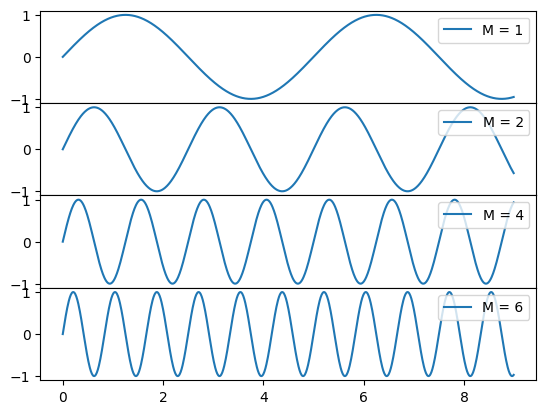

In [3]:
k = np.atleast_2d(np.array([1, 2, 4, 6]))
x = np.arange(0, 9, 0.01)
y = np.sin(2 * np.pi * k.T * x / 5)

plt.subplots_adjust(hspace=0.000)
fig = plt.figure(1)
for i, (y_local, m_val) in enumerate(zip(y, k[0])):
    ax = fig.add_subplot(k.shape[1], 1, i + 1)
    ax.plot(x, y_local, label=f'M = {m_val}')
    ax.legend(loc='upper right')

Одинаковых сигналов нет

# Задание 1c

Сигнал $x_1[n] = cos(\frac{2\pi n}{N}) + 2 cos(\frac{3\pi n}{N}),\ N = 6$ является периодическим с периодом $T = 12$

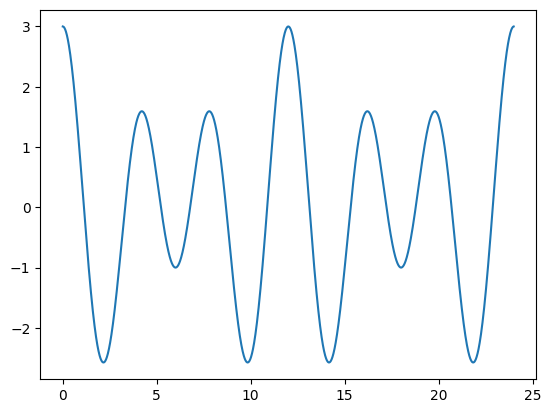

In [4]:
N = 6
x = np.arange(0, 24, 0.01)
y = np.cos(2 * np.pi * x / N) + 2 * np.cos(3 * np.pi * x / N)

plt.plot(x, y);

Сигнал $x_2[n] = 2cos(\frac{2n}{N}) + cos(\frac{3n}{N}),\ N = 6$ имеет период $T = 12\pi$, а следовательно - не периодический

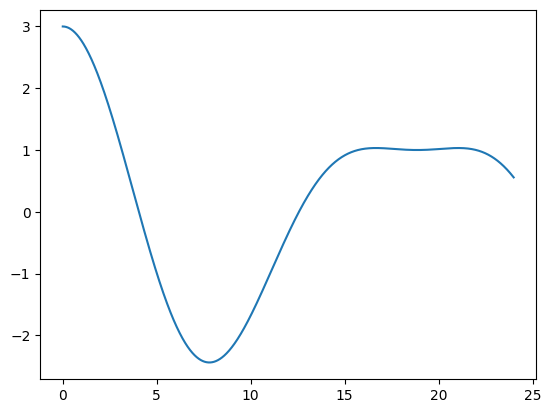

In [5]:
N = 6
x = np.arange(0, 4 * N, 0.01)
y = 2 * np.cos(2 * x / N) + np.cos(3 * x / N)

plt.plot(x, y);

Сигнал $x_3[n] = cos(\frac{2\pi n}{N}) + 3sin(\frac{5\pi n}{2N}),\ N = 6$ является периодическим с периодом $T = 24$

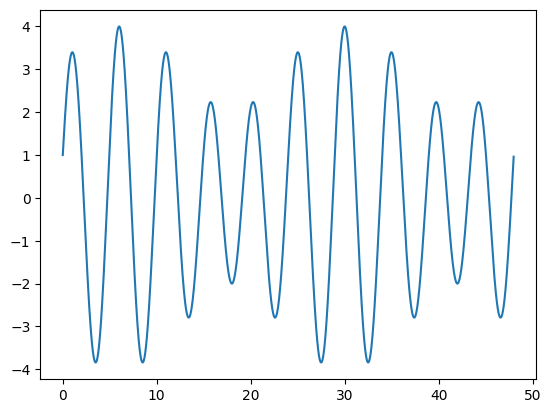

In [6]:
N = 6
x = np.arange(0, 48, 0.01)
y = np.cos(2 * np.pi * x / N) + 3 * np.sin(5 * np.pi * x / (2 * N))

plt.plot(x, y);

# Задание 1d

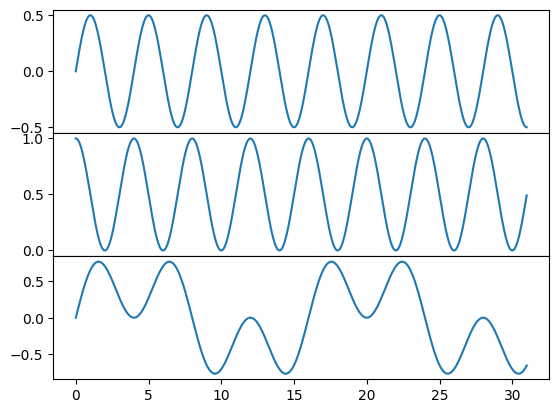

In [7]:
x = np.arange(0, 31, 0.01)
y = [
    np.sin(np.pi * x / 4) * np.cos(np.pi * x / 4),
    (np.cos(np.pi * x / 4) ** 2),
    np.sin(np.pi * x / 4) * np.cos(np.pi * x / 8)
    ]

plt.subplots_adjust(hspace=0.000)
fig = plt.figure(1)
for i, y_local in enumerate(y):
    ax = fig.add_subplot(3, 1, i + 1)
    ax.plot(x, y_local)

Для первого сигнала период равен $T_1 = 4$, для второго $T_2 = 4$, для третьего $T_3 = 16$
Без рисунков, найти период можно исходя из определения периодичности $x[n] = x[n + N]$ и периодичности синуса и косинуса

# Задание 1e
### Если $T \in \Re$
Результат сложения двух периодических сигналов не всегда будет периодическим сигналом, пример $x[n]=sin(n)+cos(2\pi n)$. Период $sin(n)$ равен $2\pi$, период $cos(2\pi n)$ равен $1$, следовательно не найдется двух целых чисел $a$ и $b$, что $a * 1 = b * 2\pi$, а значит общего периода для них не будет. Для произведения аналогично
### Если $T \in \mathit{N}$
В таком случае сумма и произведение периодических сигналов всегда будут периодической, т.к. периоды всегда будут сопоставимыми числами и мы всегда сможем вычислить период суммы и произведения

# Задание 2a,b

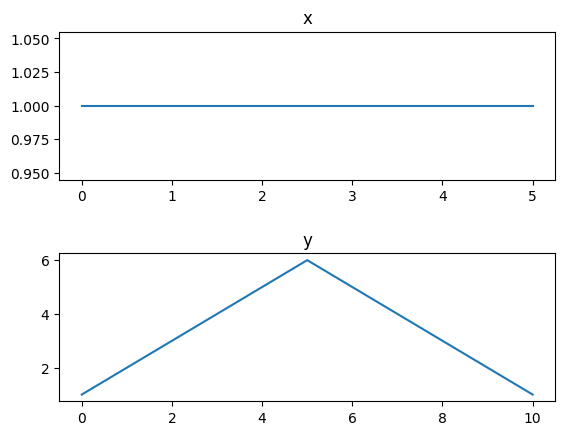

In [8]:
def convolution(nx, x, nh, h):
    yn = np.arange(nx[0] + nh[0], nx[-1] + nh[-1] + 1)
    y = np.convolve(x, h)
    return yn, y

def subplot(*args):
    plt.subplots_adjust(hspace=0.5)
    fig = plt.figure(1)
    rows = len(args)
    for i, tpl in enumerate(args):
        xn, x, *rest = tpl
        ax = fig.add_subplot(rows, 1, i + 1)
        ax.plot(xn, x)
        if rest:
            ax.set_title(rest[0])

sn = np.arange(6)
s = np.ones(6)

yn, y = convolution(sn, s, sn, s)
subplot((sn, s, 'x'), (yn, y, 'y'))

# Задание 2c

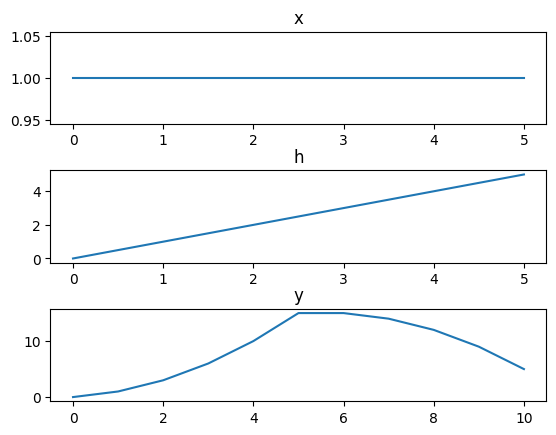

In [9]:
xn = np.arange(6)
x = np.ones(6)

hn = np.arange(6)
h = np.arange(6)

yn, y = convolution(xn, x, hn, h)

subplot((xn, x, 'x'), (hn, h, 'h'), (yn, y, 'y'))

# Задание 2d

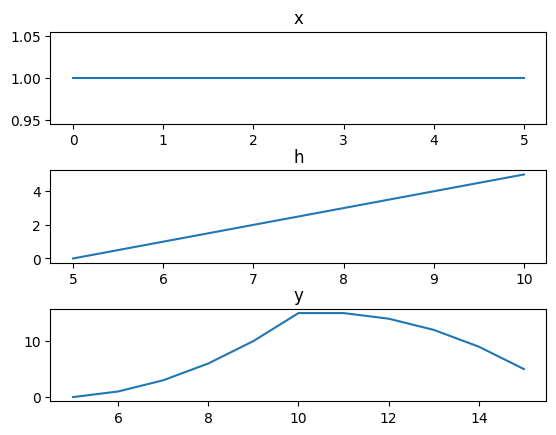

In [10]:
xn = np.arange(6)
x = np.ones(6)

hn = np.arange(6) + 5
h = np.arange(6)

yn, y = convolution(xn, x, hn, h)

subplot((xn, x, 'x'), (hn, h, 'h'), (yn, y, 'y'))

# Задание 3a

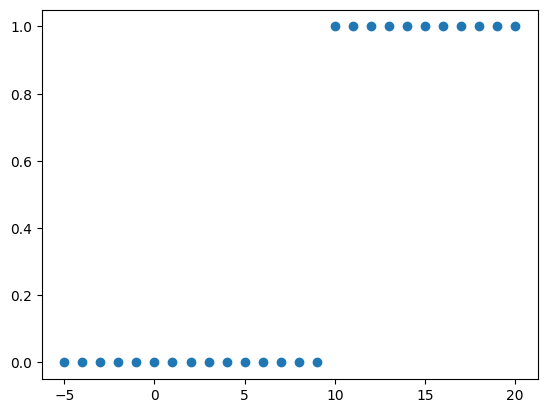

In [11]:
def stepseq(t, l, r):
    yn = np.arange(l, r + 1)
    y = np.zeros(r - l + 1)
    y[max(t - l, 0):] = 1
    return yn, y

yn, y = stepseq(10, -5, 20)
plt.scatter(yn, y);

[1. 2. 3. 4.]


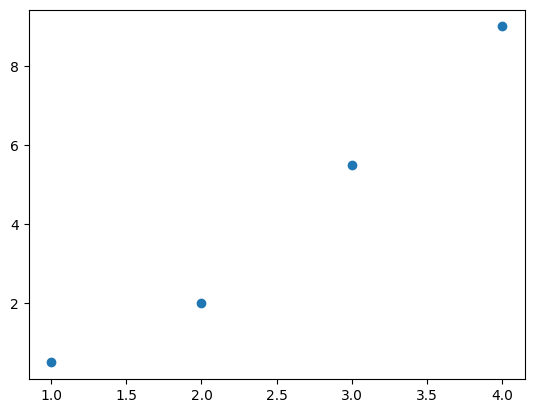

In [12]:
un, u = stepseq(0, 1, 4)
xn, x = un, un * u
print(x)
y = lfilter([0.5, 1, 2], [1], x)
plt.scatter(xn, y);

# Задание 3b

[1. 2. 3. 4.]


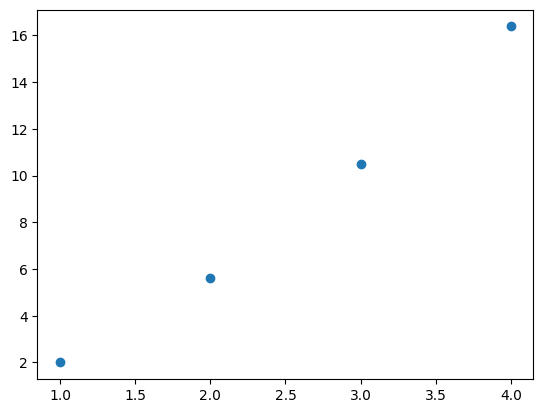

In [13]:
un, u = stepseq(0, 1, 4)
xn, x = un, un * u
print(x)
y = lfilter([2], [1, -0.8], x)
plt.scatter(xn, y);

# Задание 3c

[1. 2. 3. 4.]


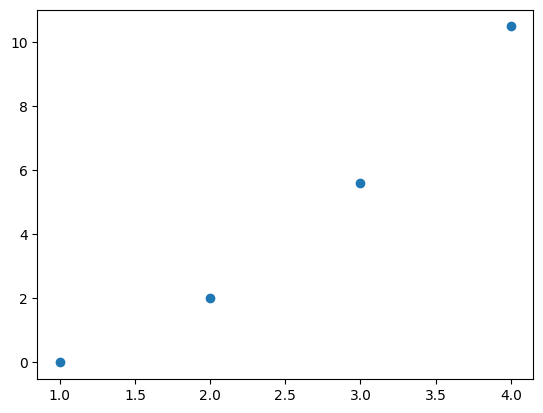

In [14]:
un, u = stepseq(0, 1, 4)
xn, x = un, un * u
print(x)
y = lfilter([0, 2], [1, -0.8], x)
plt.scatter(xn, y);

# Задание 3d,e

In [15]:
xn, x = np.arange(0, 6), np.ones(6)
hn, h = np.arange(0, 6), np.arange(0, 6)
print(*convolution(xn, x, hn, h), sep='\n')

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0.  1.  3.  6. 10. 15. 15. 14. 12.  9.  5.]


In [16]:
print(lfilter(h, [1], np.hstack([x, np.zeros(5)])))

[ 0.  1.  3.  6. 10. 15. 15. 14. 12.  9.  5.]


# Задание 4a

array([ 0.00000000e+00,  5.13858029e-01,  7.82701453e-02,  6.05992062e-01,
        1.45618114e+00,  1.31056303e+00,  1.05780603e+00,  1.12870929e+00,
        7.85510458e-01, -3.17128521e-02, -2.85415669e-02, -2.51140469e-01,
        4.19984155e-01, -2.78092908e-01, -8.93560814e-01, -8.04204732e-01,
       -7.19193110e-01, -1.21301151e-01,  5.08804246e-01,  1.62866713e+00,
        1.46580042e+00,  1.70025029e+00,  1.92836123e+00,  1.69301502e+00,
        2.07835649e+00,  1.87052084e+00,  8.89655932e-01,  1.17695506e+00,
        7.70819565e-01, -1.80332177e-01, -1.62298959e-01,  6.27253462e-01,
        9.43805549e-01,  1.17068295e+00, -4.58880335e-02, -4.12992302e-02,
        1.55867372e-01,  3.73924199e-01,  1.22346740e-01, -5.44435728e-01,
       -4.89992155e-01, -1.67697171e+00, -1.71414351e+00, -1.52866040e+00,
       -1.72288343e+00, -1.55059509e+00, -1.23451476e+00, -1.78977418e+00,
       -1.31776238e+00, -1.53679752e+00, -1.38311776e+00,  7.53543017e-04,
       -3.58604516e-01, -

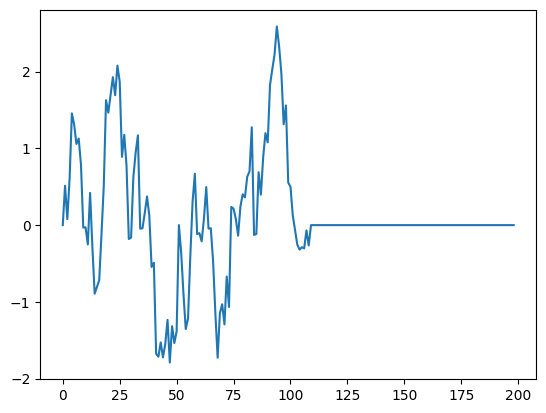

In [17]:
xn = np.arange(0, 100)
x = np.cos(xn ** 2) * np.sin(2 * np.pi * xn / 5)
u1n, u1 = stepseq(0, 0, 99)
u2n, u2 = stepseq(10, 0, 99)
hn, h = np.arange(0, 100), 0.9 ** xn * (u1 - u2)
yn, y = convolution(xn, x, hn, h)
plt.plot(yn, y)
y

# Задание 4b

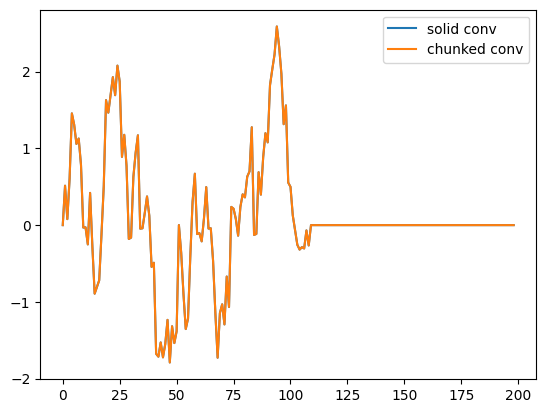

In [18]:
x0n, x1n = np.split(xn, 2)
x0, x1 = np.split(x, 2)
y0n, y0 = convolution(x0n, x0, hn, h)
y1n, y1 = convolution(x1n, x1, hn, h)

y_new = np.zeros(y1n[-1] + 1)
y_new[0:len(y0)] = y0
k = 50
y_new[k:k+len(y1)] += y1
plt.plot(yn, y, label='solid conv')
plt.plot(np.arange(y_new.shape[0]), y_new, label='chunked conv')
plt.legend();

# Задание 4c

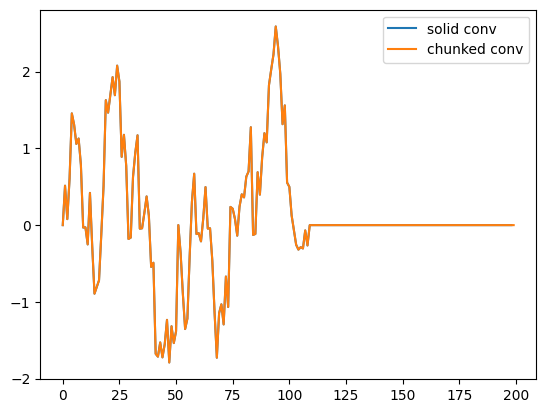

In [19]:
def overlap_add_convolution(h, x, l):
    x_n, h_n = x.shape[0], h.shape[0]
    output = np.zeros(x_n + h_n)
    for left in range(0, x.shape[0], l):
        y_i = np.convolve(x[left:left+l], h)
        output[left:left+len(y_i)] += y_i
    return np.arange(output.shape[0]), output

yn_new, y_new = overlap_add_convolution(h, x, 10)
plt.plot(yn, y, label='solid conv')
plt.plot(yn_new, y_new, label='chunked conv')
plt.legend();